<a href="https://colab.research.google.com/github/JonathanAlzate/UDEA-ai4eng-20252/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.01 - PROYECTO KAGGLE

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jonathanalzate","key":"1bc62aef0d7700b095ee043b8564cea5"}'}

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
!chmod 600 /content/kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.34GB/s]


## unzip and inspect data

In [4]:
!unzip udea*.zip > /dev/null

In [8]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## load `train.csv` data with pandas



In [19]:
# 1) Librerías y estilo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_colwidth", 120)
sns.set_theme(style="whitegrid")

# 2) Cargar datos
train_path = "/content/train.csv"
test_path  = "/content/test.csv"

df = pd.read_csv(train_path)
print(df.shape)
df.sample(3)


(692500, 21)


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
170223,2381,20203,ADMINISTRACION DE EMPRESAS,VALLE,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,bajo,0.282,0.204,0.278,0.253
60989,955592,20183,BACTERIOLOGIA Y LABORATORIO CLINICO,NORTE SANTANDER,Entre 4 millones y menos de 5.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,bajo,0.290,0.207,0.291,0.294
324459,195549,20203,MEDICINA,BOLIVAR,Entre 2.5 millones y menos de 4 millones,NaN,Estrato 2,Si,Postgrado,NaN,NaN,N,No,NaN,Si,Educación profesional completa,alto,0.218,0.313,0.296,0.324


In [20]:
# 3) Radiografía rápida: tipos, nulos, duplicados
n_rows, n_cols = df.shape
print(f"Filas: {n_rows:,} | Columnas: {n_cols:,}")

print("\nTipos de datos:")
display(df.dtypes.to_frame("dtype").T)

print("\nDuplicados de fila exacta:")
print(df.duplicated().sum())

print("\nTop 20 columnas por % de nulos:")
nulls = df.isna().mean().sort_values(ascending=False)
display(nulls.head(20).to_frame("pct_null").style.format("{:.1%}"))

Filas: 692,500 | Columnas: 21

Tipos de datos:


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
dtype,int64,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64



Duplicados de fila exacta:
0

Top 20 columnas por % de nulos:


,pct_null
F_TIENEAUTOMOVIL,6.3%
F_TIENELAVADORA,5.7%
F_TIENECOMPUTADOR,5.5%
F_ESTRATOVIVIENDA,4.6%
E_HORASSEMANATRABAJA,4.5%
F_TIENEINTERNET.1,3.8%
F_TIENEINTERNET,3.8%
F_EDUCACIONMADRE,3.4%
F_EDUCACIONPADRE,3.3%
E_PAGOMATRICULAPROPIO,0.9%


# Distribución de la etiqueta
La variable objetivo del reto es RENDIMIENTO_GLOBAL con niveles categóricos como bajo, medio-bajo, medio-alto y alto; grafícalo para ver el balance de clases.

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-alto,171619
medio-bajo,172275


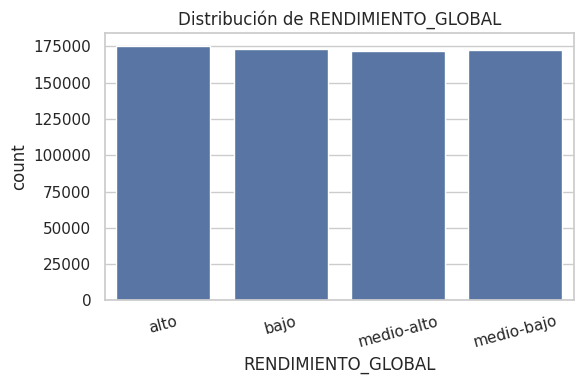

In [21]:
target_col = "RENDIMIENTO_GLOBAL"
assert target_col in df.columns, "No se encuentra RENDIMIENTO_GLOBAL en el dataset"

vc = df[target_col].value_counts().sort_index()
display(vc.to_frame("count"))

plt.figure(figsize=(6,4))
sns.countplot(x=df[target_col], order=vc.index)
plt.title("Distribución de RENDIMIENTO_GLOBAL")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Por localidades y programa
Estos recuentos muestran cuántos estudiantes hay por departamento y por programa, y un stacked bar cruzado con la etiqueta para los top-10 de cada uno.


Top 15 de E_PRGM_DEPARTAMENTO:


,count
E_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018



Top 15 de E_PRGM_ACADEMICO:


,count
E_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
ADMINISTRACIÓN DE EMPRESAS,24777
INGENIERIA CIVIL,19487
MEDICINA,18099
PSICOLOGÍA,17377


RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
E_PRGM_DEPARTAMENTO,,,,
ANTIOQUIA,30.7,20.6,25.9,22.8
ATLANTICO,24.8,27.2,23.1,24.9
BOGOTÁ,27.4,23.6,24.5,24.4
BOLIVAR,18.5,31.9,23.1,26.6
BOYACA,26.8,16.6,31.6,24.9
CUNDINAMARCA,40.8,14.1,25.6,19.5
NARIÑO,16.9,25.8,27.3,30.0
NORTE SANTANDER,13.7,31.4,25.1,29.8
SANTANDER,32.3,18.0,26.9,22.9


<Figure size 900x500 with 0 Axes>

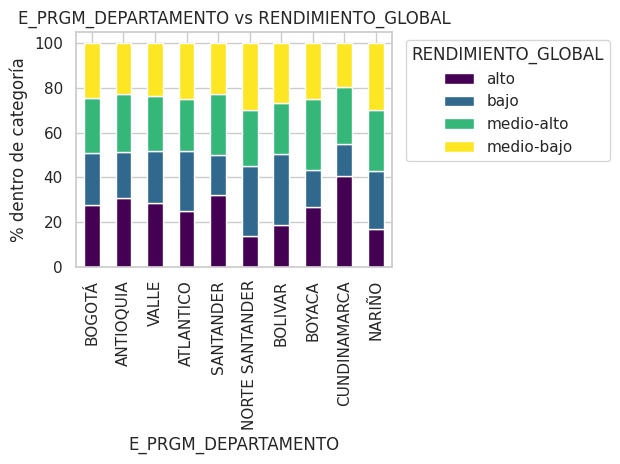

RENDIMIENTO_GLOBAL,alto,bajo,medio-alto,medio-bajo
E_PRGM_ACADEMICO,,,,
ADMINISTRACION DE EMPRESAS,17.9,30.0,24.0,28.1
ADMINISTRACIÓN DE EMPRESAS,8.4,36.7,22.0,32.9
CONTADURIA PUBLICA,12.6,31.0,25.1,31.3
DERECHO,29.1,21.3,26.1,23.6
INGENIERIA CIVIL,40.3,13.6,26.9,19.2
INGENIERIA DE SISTEMAS,25.7,22.2,26.8,25.3
INGENIERIA INDUSTRIAL,33.3,16.7,27.2,22.9
MEDICINA,55.5,7.6,23.6,13.3
PSICOLOGIA,23.4,25.2,24.9,26.4


<Figure size 900x500 with 0 Axes>

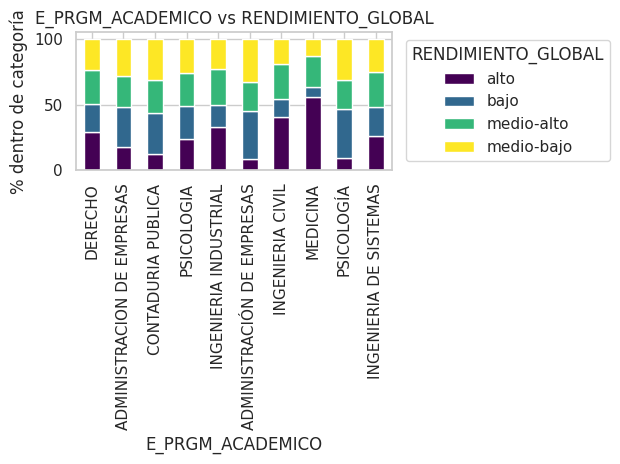

In [22]:
sns.set_theme(style="whitegrid")

# 1) Recuentos simples
for col in ["E_PRGM_DEPARTAMENTO", "E_PRGM_ACADEMICO"]:
    if col in df.columns:
        print(f"\nTop 15 de {col}:")
        display(df[col].value_counts().head(15).to_frame("count"))

# 2) Cruces con la etiqueta
for col in ["E_PRGM_DEPARTAMENTO", "E_PRGM_ACADEMICO"]:
    if col in df.columns:
        topk = df[col].value_counts().head(10).index
        tmp = df[df[col].isin(topk)]
        ct = pd.crosstab(tmp[col], tmp[target_col], normalize="index")*100
        display(ct.round(1))

        plt.figure(figsize=(9,5))
        ct.loc[topk].plot(kind="bar", stacked=True, colormap="viridis")
        plt.ylabel("% dentro de categoría")
        plt.title(f"{col} vs {target_col}")
        plt.legend(title=target_col, bbox_to_anchor=(1.02, 1), loc="upper left")
        plt.tight_layout()
        plt.show()

# Indicadores numéricos
En el material base hay cuatro indicadores numéricos (INDICADOR_1 a INDICADOR_4); grafica histogramas y su matriz de correlaciones

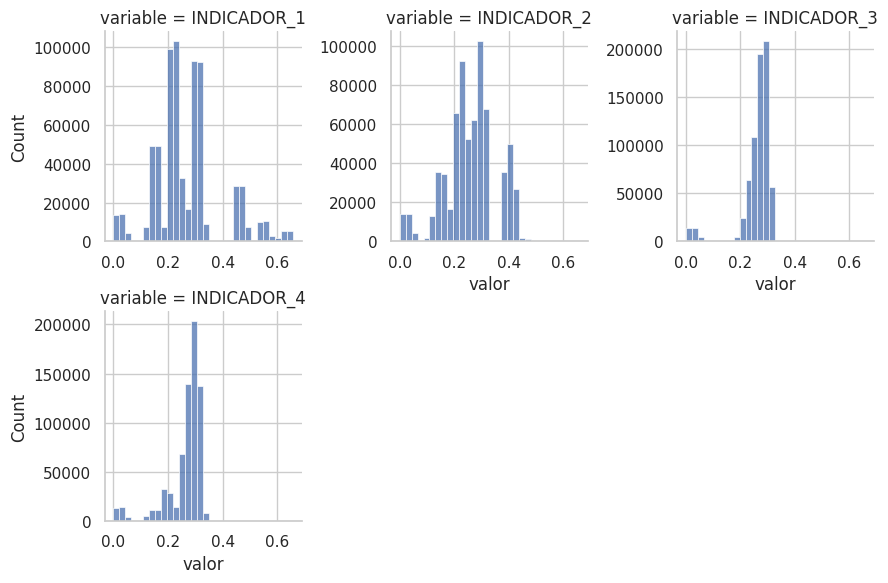

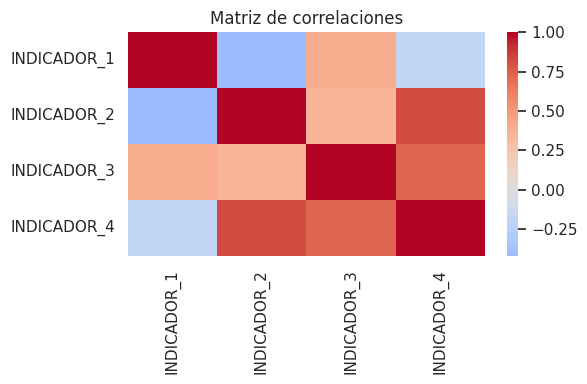

In [23]:
indicadores = [c for c in ["INDICADOR_1","INDICADOR_2","INDICADOR_3","INDICADOR_4"] if c in df.columns]
nums = indicadores if indicadores else df.select_dtypes(include=[np.number]).columns.tolist()

# Histogramas
g = sns.displot(
    df[nums].melt(var_name="variable", value_name="valor"),
    x="valor", col="variable", col_wrap=3,
    facet_kws=dict(sharex=False, sharey=False),
    height=3, bins=30
)
plt.tight_layout()

# Correlaciones
if len(nums) >= 2:
    corr = df[nums].corr(numeric_only=True)
    plt.figure(figsize=(6,4))
    sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
    plt.title("Matriz de correlaciones")
    plt.tight_layout()
    plt.show()

# Variables socioeconómicas
Explora variables categóricas de baja cardinalidad como F_ESTRATOVIVIENDA, F_TIENEINTERNET y F_EDUCACIONMADRE para entender su distribución.

Categóricas de baja cardinalidad (<=20): 13


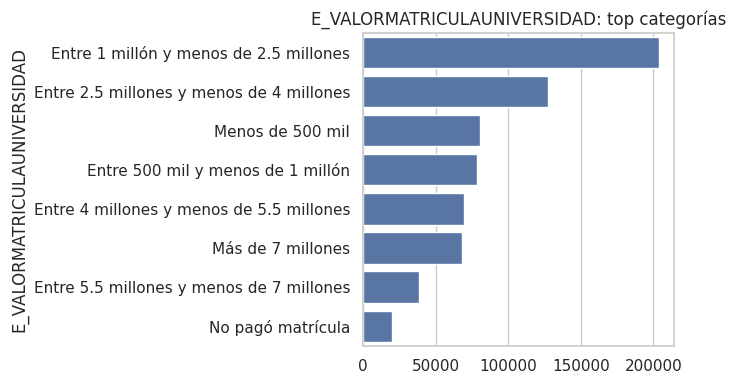

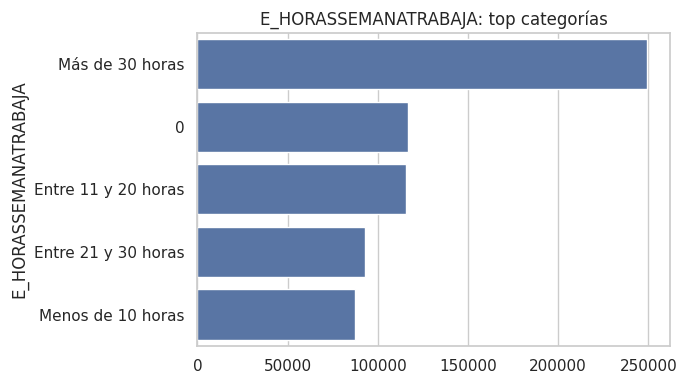

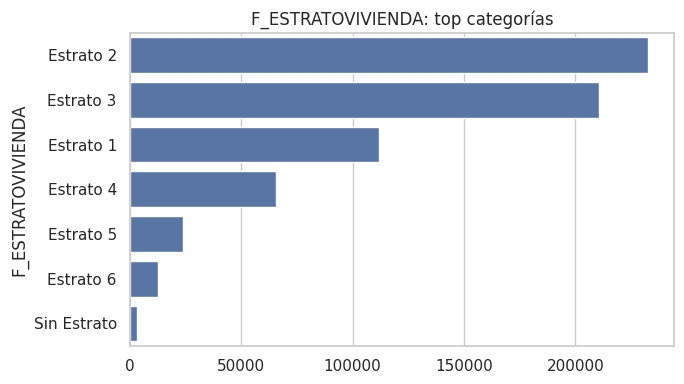

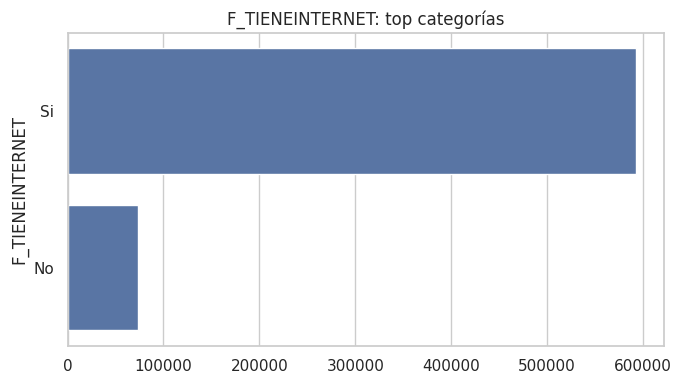

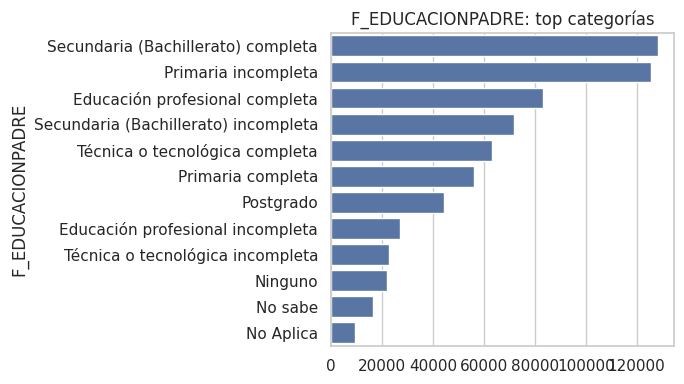

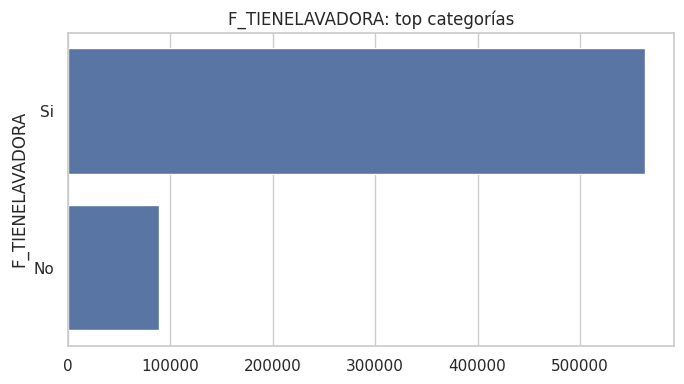

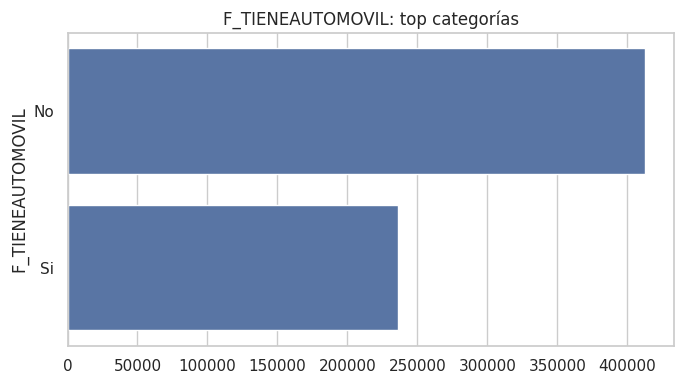

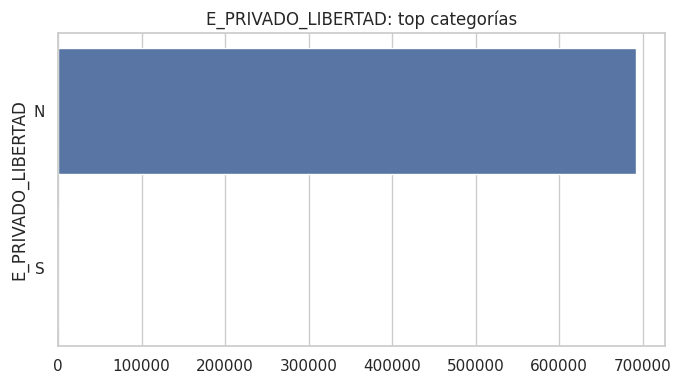

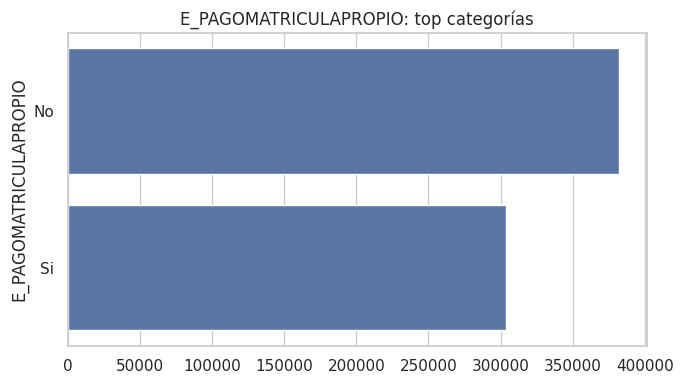

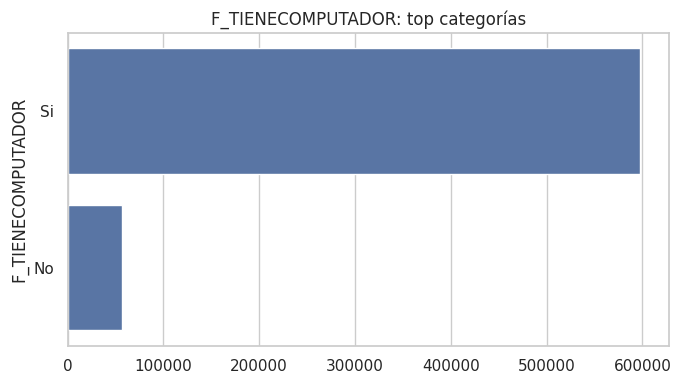

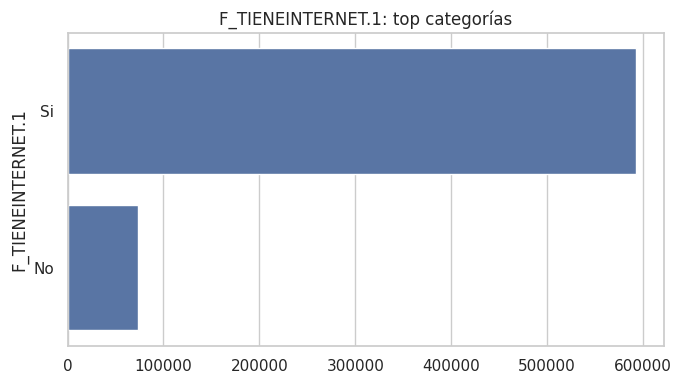

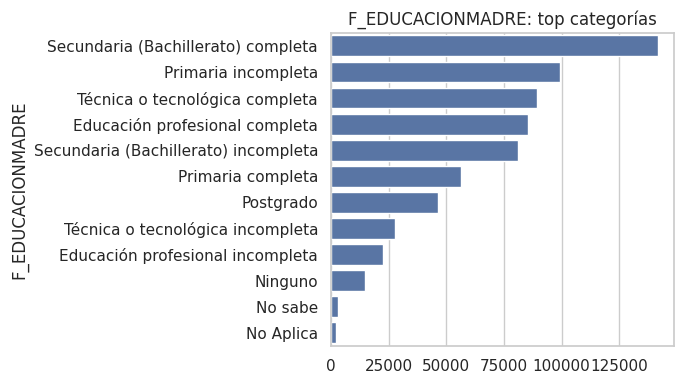

In [24]:
cat_cols = [c for c in df.columns if c not in df.select_dtypes(include=[np.number]).columns]
low_card = [c for c in cat_cols if df[c].nunique(dropna=False) <= 20]

print("Categóricas de baja cardinalidad (<=20):", len(low_card))
for c in low_card[:12]:
    vc = df[c].value_counts(dropna=False).head(20)
    plt.figure(figsize=(7,4))
    sns.barplot(x=vc.values, y=vc.index, orient="h")
    plt.title(f"{c}: top categorías")
    plt.tight_layout()
    plt.show()